# Executive Summary

The following research project aims to utilize Python programming to consider debt and credit related issues:

1) __Credit Rating Predictor__: Predict the developing credit ratings of a company based on credit rating agency outlooks

<span style="color: red;">This notebook was created by Sameet Banerjee on November 23rd, 2023</span>

# Why?

During the Alternative Asset Management Class ("Alts") class, there was a case study on the topic of a distressed debt investment in Pierre Foods by Oaktree Capital Management. It was brought to life by Don Jackson Associates Alexis Cisneros and Hayden Eelkema. 

As I was heading into the Power & Utilities Financial Restructuring Group ("POW FRG") at Houlihan Lokey, I gained quite an interest in the mechanics of the case and analyzing the Pierre Foods term loan and suboordinated debt instruments through the lens of Oaktree.  

Fast forward to the present where I am heading back to Houlihan Lokey's POW FRG in July 2024. Now post-internship and serving as a Don Jackson Associate myself, I am deeply interested in the leveraged side of finance. To improve on not only my leveraged finance accumen, but on my real world investing (ex: my personal stock portfolio) and my Python skills, I created this workbook.

# Acknowledgements

I cannot credit the creation of this project without citing a few people who have continually encouraged me, fostered my intellectual curiosity, and affirmed my need for performance based achievement.

1) __Professor William Maxwell__, for creating the Alts class that aided me in my personal and professional development
2) __Professor Allen Gwinn__, for illustrating how essential programming languages are for financial analysis
3) __Victor Sandoval__, for reminding me that there is always upside to hard work and learning
4) __Chris Warley__, for giving me the confidence to believe in my own self more
5) __Bill Kowalski__, for allowing me to lean into my own natural curiosity
6) __Luke Bley__, who took an unknowing sophomore and paid it forward
7) __Wesley Sparr__, for patiently teaching about investing each week
8) __Ken Gao__, who furthered my technical skills in Excel / PowerPoint
---

# Modules and Assumptions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Credit Rating Predictor

A common way to value the creditworthiness of a company is to use a credit rating, a formal and independent opinion of a borrower's ability to service its debt obligations. Credit ratings are typically provided by Standard & Poor's ("S&P"), Moody's Investor Services ("Moody's"), and Fitch IBCA ("Fitch"). The following image describes the different rating scales adopted by these rating agencies:

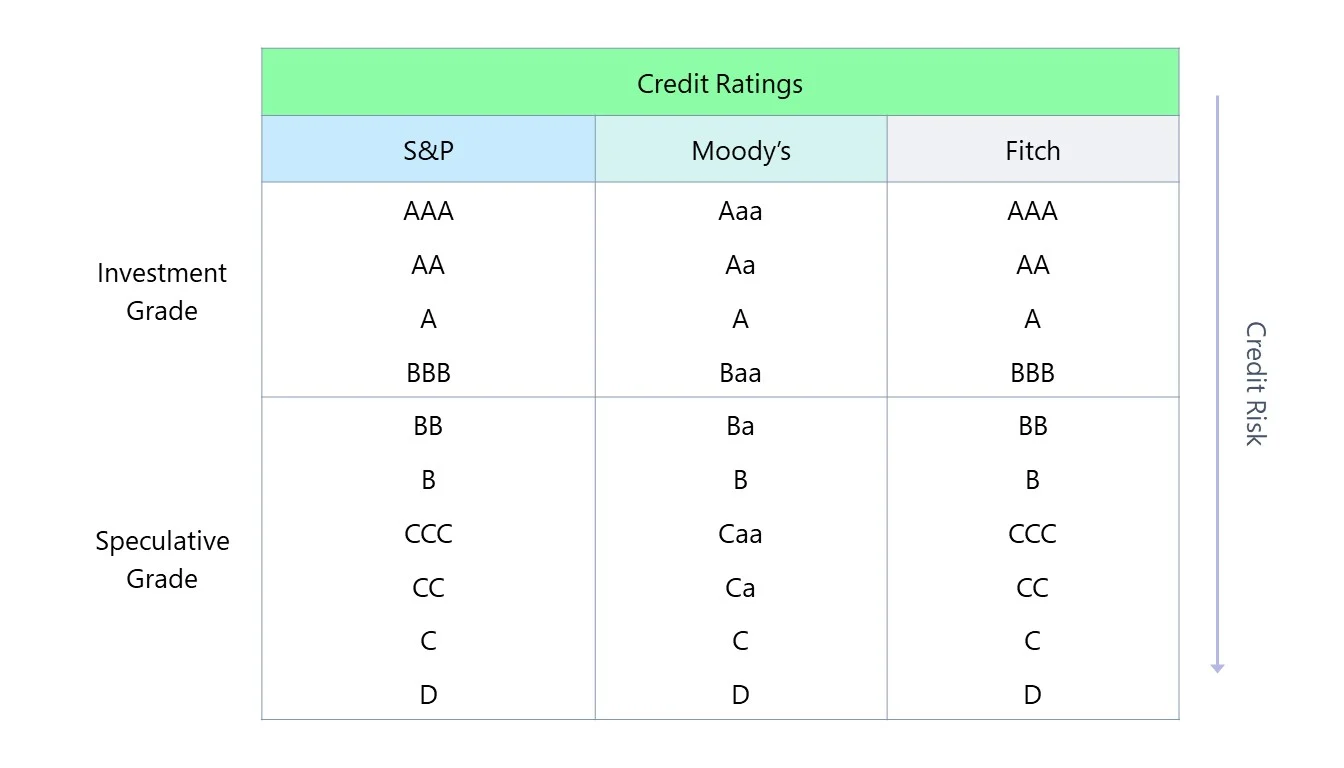

Investors categorize companies or debt instruments with a credit rating of BBB-/Baa3/BBB- or above as investment grade ("IG"), with anything below classified as speculative or high yield ("HY"). Each agency provides a detailed overview of their rating methodologies, but for the purpose of this project we will focus on two broad risk areas:

1) Business Risk: Evaluation of market position, geographic reach, industry dynamics, and relative strengths/weaknesses.
2) Financial Risk: Evaluation of financial ratios concerning debt capacity, leverage, coverage, liquidity and solvency.

The following models will likely take a deeper dive into these characteristics. To eliminate redundancies, this analysis will quantify another aspect of credit ratings: the outlooks. An extension of the borrower or issue's credit rating is the rating outlook defined as 'stable', 'negative', 'positive' or 'developing'.

First, the credit ratings can be quantified on a scale of *1* through *10*, with *1* representing the highest credit rating and *10* representing a credit rating of D, or a high likelyhood of default. We can create a dictionary to illustrate this relationship.


In [ ]:
# Create the S&P Credit Rating Dictionary which assigns a 1 - 10 value to each credit rating

SP = {
'AAA' : 1,
'AA' : 2,
'A' : 3,
'BBB' : 4,
'BB' : 5,
'B' : 6,
'CCC' : 7,
'CC' : 8,
'C' : 9,
'D' : 10,    
}

# Create the Moody's Credit Rating Dictionary which assigns a 1 - 10 value to each credit rating

Moodys = {
'Aaa' : 1,
'Aa' : 2,
'A' : 3,
'Baa' : 4,
'Ba' : 5,
'B' : 6,
'Caa' : 7,
'Ca' : 8,
'C' : 9,
'D' : 10,    
}

# Create the Fitch Credit Rating Dictionary which assigns a 1 - 10 value to each credit rating

Fitch = {
'AAA' : 1,
'AA' : 2,
'A' : 3,
'BBB' : 4,
'BB' : 5,
'B' : 6,
'CCC' : 7,
'CC' : 8,
'C' : 9,
'D' : 10,    
}

Next, we can quantify each of the rating outlooks that credit rating agencies utilize. Stable will represent a score change of 0, Positive will represent a score change of +1, and Negative will represent a score change of -1.

In [ ]:
ratingOutlook = {
'Stable' : 0,
'Positive' : 1,
'Negative' : -1,
}

Now that we have our dictionaries created, we can choose a company and then see where its credit rating is at. For this example, we will use __Disney (NYSE: DIS)__. As of November 25th, 2023, S&P rates Disney at an A- rating, Moody's rates Disney at a A2 rating, and Fitch rates Disney at an A- rating.

For simplification, we will assume these ratings align with the above dictionaries for the ratings of A/A/A respectively. We can create an input section that will spit out the average between all 3 credit ratings.

In [ ]:
SPRating = input('Enter the S&P Credit Rating of the target company: ' )
MoodysRating = input(f"Enter the Moody's Credit Rating of the target company: " )
FitchRating = input('Enter the Fitch Credit Rating of the target company: ' )

With the credit ratings now aggregated under variables, we can convert them to their quantified values and then average them to find where the company's credit rating currently is under all credit rating agencies.

In [ ]:
SPRatingQuantified = SP[SPRating]
MoodysRatingQuantified = Moodys[MoodysRating]
FitchRatingQuantified = Fitch[FitchRating]

averageRating = int(np.mean([SPRatingQuantified, MoodysRatingQuantified, FitchRatingQuantified]))

With the average credit rating quantified, we just need to convert this quantification back to the actual letter credit rating. For ease, I will be reversing the SP dictionary ("SPReversed") and the S&P credit ratings classification.

In [ ]:
SPReversed = {
1 : 'AAA',
2 : 'AA',
3 :'A',
4 : 'BBB',
5 : 'BB',
6 : 'B',
7 : 'CCC',
8 : 'CC',
9 : 'C',
10 : 'D',    
}

SPReversed[averageRating]

With the average credit rating across all three credit rating agencies confirming that Disney is at an A rating, we can now insert our outlooks into each credit rating agency and see where the new average credit rating lies.

__<font size="4"><span>Remarks </span>__

<span style="color: red;">*Limitations of the Credit Rating Predictor*</span>: While credit ratings are helpful, rating agencies require time to adjust ratings. Due to the lag, rating downgrades can be a bit behind the curve and may only serve as a sanity check to known information.

<span style="color: blue;">*Potential Improvements to the Credit Rating Predictor*</span>: Ideally, one could quantify the effects of certain financial ratios and business risks to achieve a forward looking measure of a company's or debt instrument's credit rating. Being molecular and differentiating between the 'modifiers' of credit ratings (ex: A+ versus A-) would also give a better picture of the financial strength of a company.

<span style="color: green;">*Usage of the Credit Rating Predictor*</span>: With a selected target company, one could compare the output of the Credit Rating Predictor to the peer median of the target company to gain a picture of the target's financial strength.

__<font size="4"><span>Citations </span>__

<span style="color: black;">*(1): "Corporate credit ratings: a quick guide" by Krista Santos*

<span style="color: black;">*(2): "Credit Rating: Understand Credit Ratings to Measure Risk" by Wall Street Prep*